# Широков Илья

## Лабораторная работа №1

## Вариант 2

## Отмена рейсов

In [28]:
import pandas as pd
flights=pd.read_csv('flights.csv', nrows=500000)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Подсчитайте количество отменённых рейсов.

In [3]:
#print(fb.groupby('CANCELLED')['FLIGHT_NUMBER'].count())
cancelled=flights['CANCELLED'].value_counts()
cancelled.index=['Неотменен', 'Отменен']
cancelled

Неотменен    483176
Отменен       16824
Name: CANCELLED, dtype: int64

## 2. Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [27]:
airp=flights.groupby(['ORIGIN_AIRPORT', 'CANCELLED'])['CANCELLED'].count()
airp=airp.unstack()
airp.columns = ['Неотмененные', 'Отмененные']
airp.sort_values(by=['Отмененные'], ascending=False).head()

,Неотмененные,Отмененные
ORIGIN_AIRPORT,,
ORD,22899.0,2068.0
LGA,8940.0,1190.0
BOS,8456.0,963.0
EWR,8394.0,864.0
DFW,24046.0,605.0


## 3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. 
## Оцените значение p-value. Постройте плотность распределения признаков

In [5]:
flights['CANCELLED'].corr(flights['DAY'])

-0.03881559296576545

In [6]:
from scipy import stats
stats.spearmanr(flights['CANCELLED'],flights['DAY'])

SpearmanrResult(correlation=-0.04326754293642243, pvalue=9.281465260191894e-206)

In [7]:
d = pd.Series(flights['DAY'])
d.plot.kde()

In [8]:
flights['CANCELLED'].corr(flights['MONTH'])

0.1788518178580873

In [9]:
stats.spearmanr(flights['CANCELLED'],flights['MONTH'])

SpearmanrResult(correlation=0.17885181785805146, pvalue=0.0)

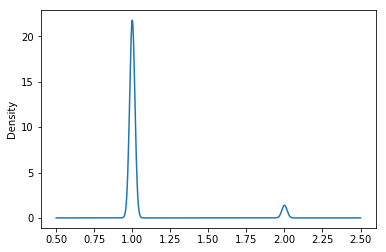

In [10]:
m = pd.Series(flights['MONTH'])
m.plot.kde()

In [11]:
sd=pd.unique(flights['ORIGIN_AIRPORT'].values)
sp=flights['ORIGIN_AIRPORT']
sp=sp.tolist()
sd=sd.tolist()
a=[]
for e in sp:
    for r in sd:
        if e == r:
            a.append(sd.index(r))
flights['indexairp'] = a
stats.spearmanr(flights['CANCELLED'],flights['indexairp'])

SpearmanrResult(correlation=0.028151701138532156, pvalue=3.322872647957258e-88)

In [12]:
wd=pd.unique(flights['AIRLINE'].values)
wp=flights['AIRLINE']
wp=wp.tolist()
wd=wd.tolist()
b=[]
for e in wp:
    for r in wd:
        if e == r:
            b.append(wd.index(r))
flights['indexairline'] = b
stats.spearmanr(flights['CANCELLED'],flights['indexairline'])

SpearmanrResult(correlation=0.02937553690376368, pvalue=7.125473984577561e-96)

## 4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.
### US Airport

In [13]:
#4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.
#US Airport
Diver=flights[(flights.AIRLINE == 'US')&(flights.DIVERTED == 1)].shape
Cance=flights[(flights.AIRLINE == 'US')&(flights.CANCELLED == 1)].shape
Uncan=flights[(flights.AIRLINE == 'US')&(flights.CANCELLED == 0)].shape
print("В аэропорту US было {0} рейсов перенаправлено, {1} отменено и всего  {2} рейсов".format(Diver[0], Cance[0], Uncan[0]))

В аэропорту US было 73 рейсов перенаправлено, 1268 отменено и всего  34323 рейсов


### DL Airport

In [14]:
Diver=flights[(flights.AIRLINE == 'DL')&(flights.DIVERTED == 1)].shape
Cance=flights[(flights.AIRLINE == 'DL')&(flights.CANCELLED == 1)].shape
Uncan=flights[(flights.AIRLINE == 'DL')&(flights.CANCELLED == 0)].shape
print("В аэропорту DL было {0} рейсов перенаправлено, {1} отменено и всего  {2} рейсов".format(Diver[0], Cance[0], Uncan[0]))

В аэропорту DL было 93 рейсов перенаправлено, 938 отменено и всего  67617 рейсов


### UA Airport

In [15]:
Diver=flights[(flights.AIRLINE == 'UA')&(flights.DIVERTED == 1)].shape
Cance=flights[(flights.AIRLINE == 'UA')&(flights.CANCELLED == 1)].shape
Uncan=flights[(flights.AIRLINE == 'UA')&(flights.CANCELLED == 0)].shape
print("В аэропорту UA было {0} рейсов перенаправлено, {1} отменено и всего  {2} рейсов".format(Diver[0], Cance[0], Uncan[0]))

В аэропорту UA было 78 рейсов перенаправлено, 1424 отменено и всего  39449 рейсов


## 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.

In [16]:
flights['SPEED_FLY'] = flights['DISTANCE'] /  (flights['AIR_TIME']/60)
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,indexairp,indexairline,SPEED_FLY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,514.082840
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,531.558935
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,2,517.894737
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,544.651163
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,NaN,NaN,NaN,NaN,NaN,NaN,3,0,436.582915
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,3,462.815534
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,0,NaN,NaN,NaN,NaN,NaN,NaN,4,4,506.103896
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,2,559.210526
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,507.745665
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,0,NaN,NaN,NaN,NaN,NaN,NaN,4,3,563.548387


In [17]:
sredUS=flights.groupby(flights.AIRLINE  =='US')['SPEED_FLY'].mean()
sredDL=flights.groupby(flights.AIRLINE  =='DL')['SPEED_FLY'].mean()
sredUA=flights.groupby(flights.AIRLINE  =='UA')['SPEED_FLY'].mean()
print("Средняя скорость для авиакомпании US = {0}, для DL = {1}, для UA= {2}".format(sredUS[0], sredDL[0], sredUA[0]))

Средняя скорость для авиакомпании US = 402.56317476533656, для DL = 400.6166779178843, для UA= 399.1782627502211


## 6 Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов) 

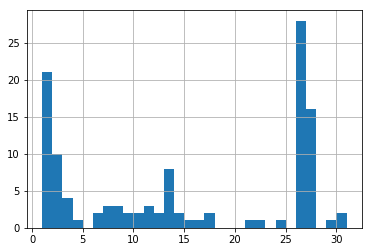

In [18]:
freqLAS = flights[(flights.ORIGIN_AIRPORT == 'LAS') & (flights['CANCELLED'] == 1)]
freqLAS.DAY.hist(bins=30)

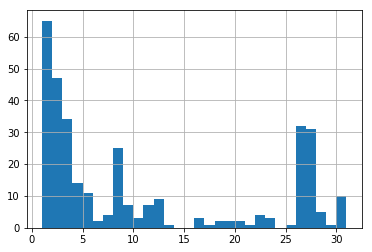

In [19]:
freqBOS = flights[(flights.ORIGIN_AIRPORT == 'DEN') & (flights['CANCELLED'] == 1)]
freqBOS.DAY.hist(bins=30)

## 7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.


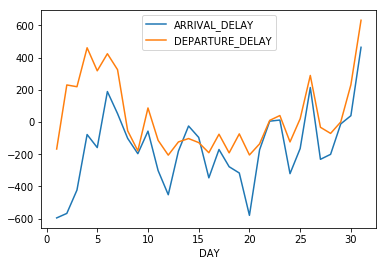

In [20]:
import seaborn as sns
delay_Flight = flights[['ARRIVAL_DELAY']+['DEPARTURE_DELAY']+['ORIGIN_AIRPORT']+['DAY']]
g1 = delay_Flight[(flights['ORIGIN_AIRPORT'] == 'ANC')]
g1=g1.dropna()
g1=g1.groupby('DAY').sum()
g1.plot()

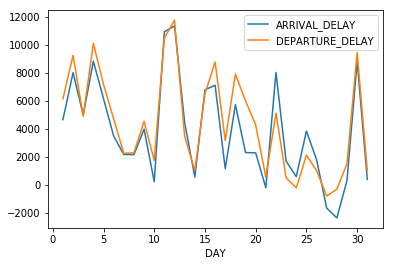

In [21]:
import seaborn as sns
delay_Flight = flights[['ARRIVAL_DELAY']+['DEPARTURE_DELAY']+['ORIGIN_AIRPORT']+['DAY']]
g1 = delay_Flight[(flights['ORIGIN_AIRPORT'] == 'SFO')]
g1=g1.dropna()
g1=g1.groupby('DAY').sum()
g1.plot()

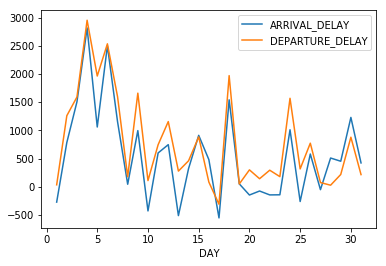

In [22]:
import seaborn as sns
delay_Flight = flights[['ARRIVAL_DELAY']+['DEPARTURE_DELAY']+['ORIGIN_AIRPORT']+['DAY']]
g1 = delay_Flight[(flights['ORIGIN_AIRPORT'] == 'PBI')]
g1=g1.dropna()
g1=g1.groupby('DAY').sum()
g1.plot()

## 8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине. ##

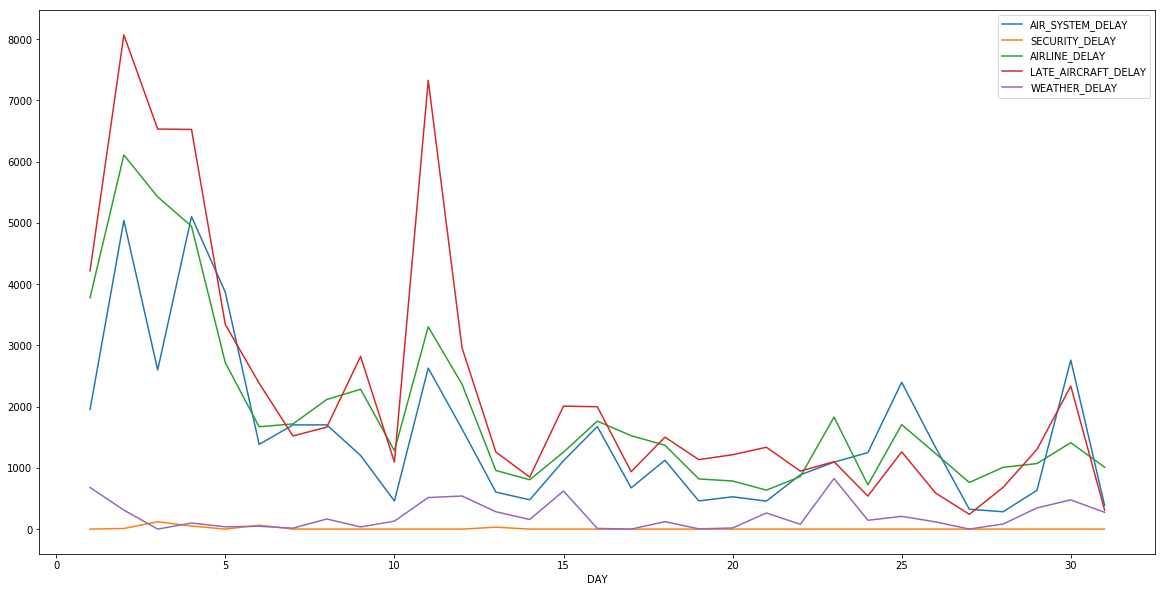

In [23]:
prichin = flights[['DAY']+['AIR_SYSTEM_DELAY']+['SECURITY_DELAY']+['ORIGIN_AIRPORT']+['AIRLINE_DELAY']+['LATE_AIRCRAFT_DELAY']+['WEATHER_DELAY']]
g2 = prichin[(flights['ORIGIN_AIRPORT'] == 'LAX')]
g2= g2.dropna()
g2=g2.groupby('DAY').sum().plot(figsize=(20, 10))

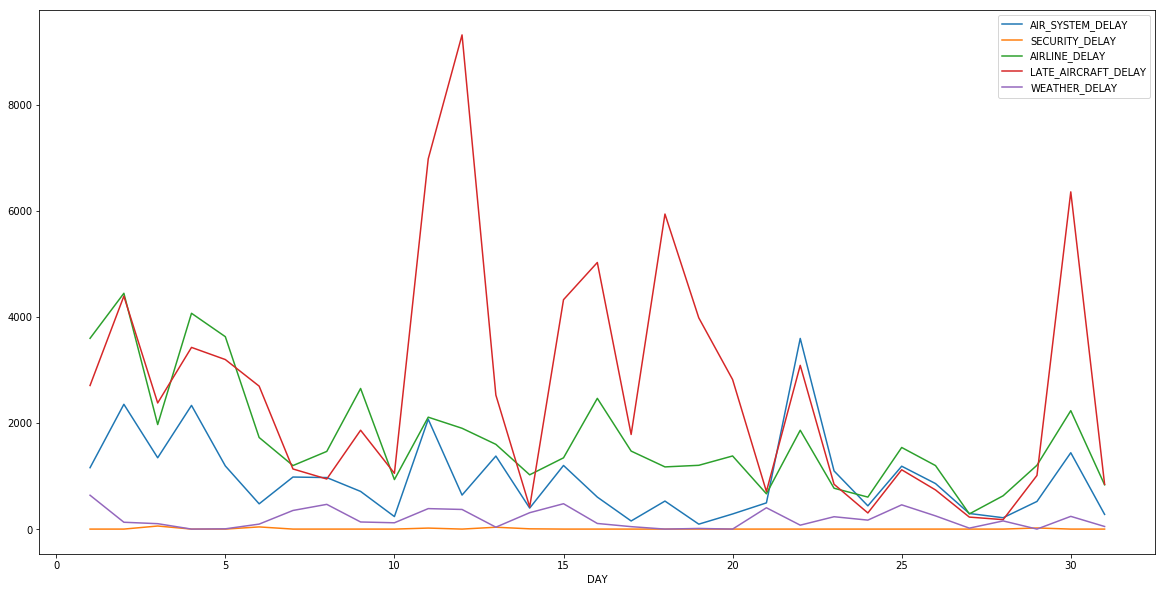

In [24]:
prichin = flights[['DAY']+['AIR_SYSTEM_DELAY']+['SECURITY_DELAY']+['ORIGIN_AIRPORT']+['AIRLINE_DELAY']+['LATE_AIRCRAFT_DELAY']+['WEATHER_DELAY']]
g2 = prichin[(flights['ORIGIN_AIRPORT'] == 'SFO')]
g2= g2.dropna()
g2=g2.groupby('DAY').sum().plot(figsize=(20, 10))

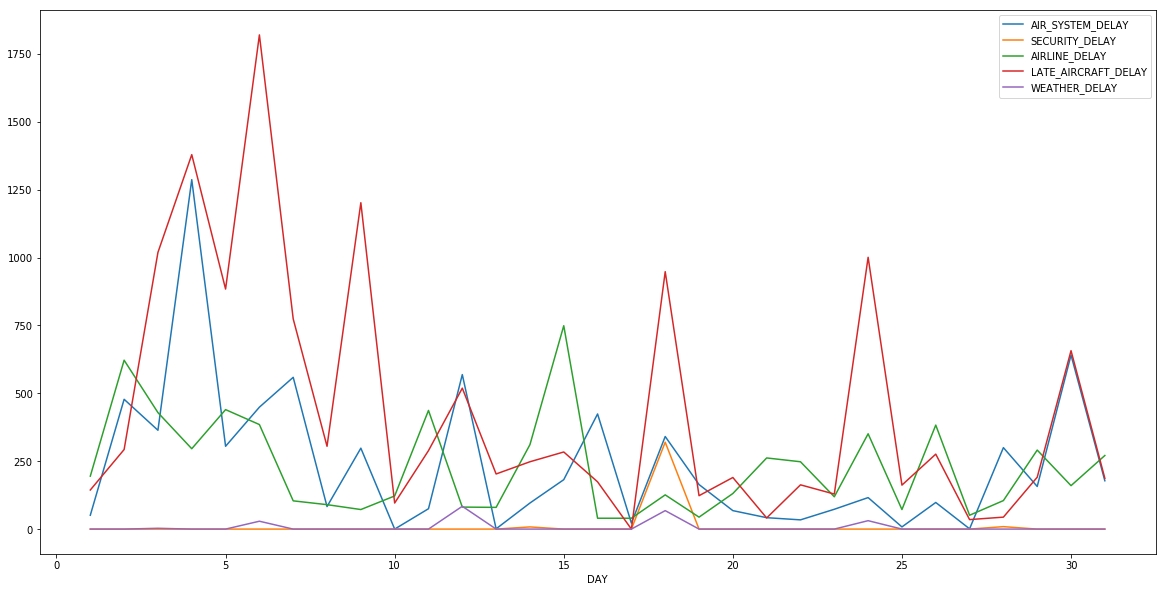

In [25]:
prichin = flights[['DAY']+['AIR_SYSTEM_DELAY']+['SECURITY_DELAY']+['ORIGIN_AIRPORT']+['AIRLINE_DELAY']+['LATE_AIRCRAFT_DELAY']+['WEATHER_DELAY']]
g2 = prichin[(flights['ORIGIN_AIRPORT'] == 'PBI')]
g2= g2.dropna()
g2=g2.groupby('DAY').sum().plot(figsize=(20, 10))

## 9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию. ##

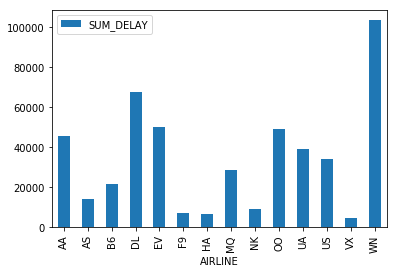

In [26]:
flights['SUM_DELAY'] = flights['ARRIVAL_DELAY'] + flights['DEPARTURE_DELAY']
Sum_1 = flights[['SUM_DELAY']+['AIRLINE']]
Sum_1 = Sum_1.dropna()
Sum_1=Sum_1.groupby('AIRLINE').count().plot(kind='bar')